# 5. 線形回帰

## 5.1. 問題の定義
- ボストンの住宅価格を線形回帰で予測するモデルを作る

## 5.2. 本章で学ぶ重要概念
- nn.Linear
    - レイヤー関数を使ってみよう
- nn.MSRLoss
    - 損失関数もクラスで実装(全章のように自前で定義しない)
- カスタムクラスを用いてモデル定義を行う

## 5.3. 線形関数(nn.Linear)

In [32]:
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchinfo import summary
from torch import optim

In [9]:
# 入力2，出力3の線形関数の定義
l3 = nn.Linear(2, 3)

In [13]:
# 入力1，出力1の線形関数
torch.manual_seed(123) # シードは固定する
l1 = nn.Linear(1,1)
print(l1)

# 初期値を設定することもできる
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

Linear(in_features=1, out_features=1, bias=True)


Parameter containing:
tensor([1.], requires_grad=True)

In [14]:
# パラメータを確認してみる
for param in l1.named_parameters():
    print(f"name  : {param[0]}")
    print(f"tensor: {param[1]}")
    print(f"shape : {param[1].shape}")
    print('-'*50)

name  : weight
tensor: Parameter containing:
tensor([[2.]], requires_grad=True)
shape : torch.Size([1, 1])
--------------------------------------------------
name  : bias
tensor: Parameter containing:
tensor([1.], requires_grad=True)
shape : torch.Size([1])
--------------------------------------------------


In [15]:
# テスト用データ
x_np = np.arange(-2, 2.1, 1)
x = torch.tensor(x_np).float()
x = x.view(-1, 1)
print(x.shape)
print(x[:5])

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [16]:
# テスト
y = l1(x)
print(y.shape)
print(y.data[:5])

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


In [17]:
# 2入力1出力
# 次節以降で実装する線形回帰はこの形
# 2変数使って予測する
l2 = nn.Linear(2, 1)
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)
print(l2.weight) # 重みが2つあることが確認できる
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [18]:
# 2入力3出力とかあるけど，大体同じなので省略

## 5.4. カスタムクラスを利用したモデル定義

- 予測関数を構築する際に使用する
- Netというクラスを作成して，レイヤ－をまとめる
- 実装はどうせ重回帰でやるので割愛

## 5.5. MSELossクラスを利用した損失関数

- 損失計算と勾配計算をまとめてやってくれるよ

## 5.6. データ準備


In [19]:
# 学習用データ準備

# 「ボストン・データセット」はscikit-learnのライブラリでも取得できるが、
# その場合、将来版で利用できなくなる予定のため、別Webサイトから取得する
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", 
    skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], 
    raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# 結果確認
print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


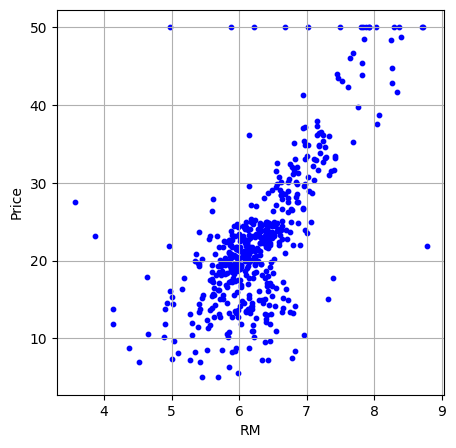

In [25]:
# データの確認
# 今回は犯罪率と部屋数を使う

x = x_org[:, feature_names == 'RM'] # 部屋数

# 目的関数との関係を可視化する
plt.figure(figsize=(5, 5))
plt.scatter(x, yt, s=10, c='b')
plt.xlabel('RM')
plt.ylabel('Price')
plt.grid()
plt.show()

## 5.7. モデル定義

In [49]:
# 入力次元数
n_input = x.shape[1] # 1 : 1変数なので1
# 出力次元数
n_output = 1

# 入力変数x と正解値 ytのテンソル変数化
inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()
# 次元数確認

print(inputs.shape)
print(labels.shape)

class Net(nn.Module):
    def __init__(self, n_input, n_output) -> None:
        
        super().__init__()

        self.l1 = nn.Linear(n_input, n_output)
        # パラメータの初期値は1にしておく
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    # 予測関数
    def forward(self, x):
        x1 = self.l1(x) # ここで線形回帰している
        return x1
    

net = Net(n_input, n_output)

for param in net.named_parameters():
    print(f"var_name : {param[0]}")
    print(f"var_value: {param[1].data}")

print(net)

torch.Size([506, 1])
torch.Size([506])
var_name : l1.weight
var_value: tensor([[1.]])
var_name : l1.bias
var_value: tensor([1.])
Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [31]:
# こういうのもある
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## 5.8. 勾配降下法

In [60]:
# 損失計算のために，ラベルをN,1の形式に変換する
labels1 = labels.view((-1, 1))

lr = 1e-2
# 1入力1出力の線形レイヤを持つモデル
net = Net(n_input, n_output)
# 損失関数
criterion = nn.MSELoss()
# 最適化関数
optimizer = optim.SGD(net.parameters(), lr=lr)
# 繰り返し回数
n_epochs = 50000
# 結果記録
history = np.zeros((0, 2))

for epoch in range(n_epochs):
    # 勾配値初期化
    optimizer.zero_grad()
    # 予測計算
    outputs = net(inputs)
    # 損失計算
    # 2で割っている？
    loss = criterion(outputs, labels1) / 2.0
    # 勾配計算
    loss.backward()
    # パラメータを更新
    optimizer.step()

    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))

## 5.9. 結果確認

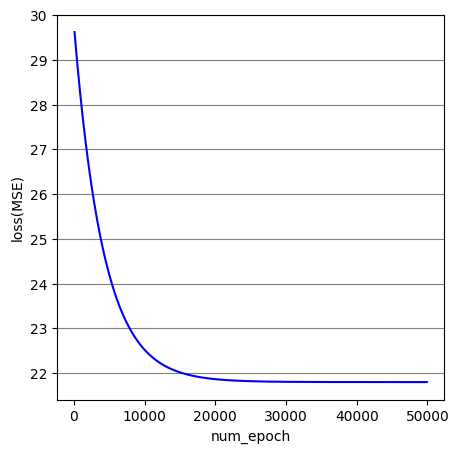

In [61]:
# 可視化して確認
plt.figure(figsize=(5,5))
plt.plot(history[1:, 0], history[1:, 1], color='blue')
plt.xlabel('num_epoch')
plt.ylabel('loss(MSE)')
plt.grid(axis='y', color='gray')
plt.show()

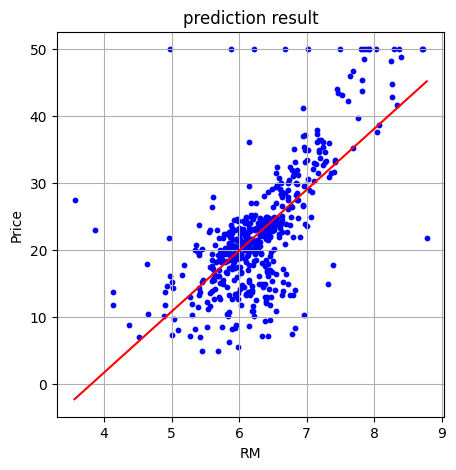

In [63]:
# いい感じに回帰できている！

xse = np.array((x.min(), x.max())).reshape(-1, 1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
    Yse = net(Xse)

plt.figure(figsize=(5,5))
plt.scatter(x, yt, s=10, c='blue')
plt.plot(Xse.data, Yse.data, c='red')
plt.xlabel('RM')
plt.ylabel('Price')
plt.title('prediction result')
plt.grid()
plt.show()

## 5.10. 重回帰モデルへの拡張 & 5.11. 学習率の変更

- epochが50000も必要なさそうなので，これを減らす
- 学習率を減らす
    - 結論からいうと学習率を減らすと精度が上がるので，大事な調整要素だとわかる

In [64]:
x_add = x_org[:, feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))
print(x2.shape)
print(x2[:5, :])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [67]:
# 再掲
class Net(nn.Module):
    def __init__(self, n_input, n_output) -> None:
        
        super().__init__()

        self.l1 = nn.Linear(n_input, n_output)
        # パラメータの初期値は1にしておく
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    # 予測関数
    def forward(self, x):
        x1 = self.l1(x) # ここで線形回帰している
        return x1

# ここは変わる
# 入力次元数
n_input = x2.shape[1] # 2：2変数に増やしたから
# 出力次元数
n_output = 1

net = Net(n_input, n_output)

print('MODEL PARAMETERS')
for param in net.named_parameters():
    print(f"var name : {param[0]}")
    print(f"var value: {param[1].data}")

MODEL PARAMETERS
var name : l1.weight
var value: tensor([[1., 1.]])
var name : l1.bias
var value: tensor([1.])


In [68]:
inputs = torch.tensor(x2).float()
# labels1はそのまま使える

In [69]:
# 初期化処理

# 学習率
lr = 0.001

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 2000 

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [70]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 誤差計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 25.35892
Epoch 200 loss: 16.39105
Epoch 300 loss: 15.40301
Epoch 400 loss: 15.29414
Epoch 500 loss: 15.28211
Epoch 600 loss: 15.28076
Epoch 700 loss: 15.28059
Epoch 800 loss: 15.28054
Epoch 900 loss: 15.28051
Epoch 1000 loss: 15.28048
Epoch 1100 loss: 15.28046
Epoch 1200 loss: 15.28043
Epoch 1300 loss: 15.28040
Epoch 1400 loss: 15.28037
Epoch 1500 loss: 15.28034
Epoch 1600 loss: 15.28031
Epoch 1700 loss: 15.28028
Epoch 1800 loss: 15.28026
Epoch 1900 loss: 15.28023


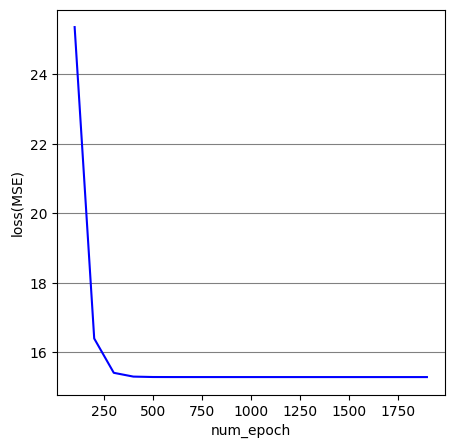

In [71]:
# 可視化して確認(よりロスがすくなっておりちゃんと学習できている)
plt.figure(figsize=(5,5))
plt.plot(history[1:, 0], history[1:, 1], color='blue')
plt.xlabel('num_epoch')
plt.ylabel('loss(MSE)')
plt.grid(axis='y', color='gray')
plt.show()